# Predicting Depreciation of Cars:

# Problem Statement :
-------------

Find cars.xlsx file. You need to develop a model to predict the depreciation of any car(rate at which car lose value over time) given the parameters which are available in the file. This data contains all the parameters of cars that will be available for predicting depreciation of a used car. It also contains the current on road price of a new car, used car price and depreciation % of the car.You may need to remove the outliers etc. Final output of the model should be depreciation % given the make, model, variant, color, number of owners, Kms driven, body type, transmission, fuel type and on road price.

## Solution/Approach
#### Steps
1. Reading csv(converted xlsx to csv) file and then checking dimension,few rows to know little about data etc 
2. Variable identification to know about <b>continuous or categorical in nature</b> and i find <b>3 observations</b>
3. Univariate analysis<br/>
    A. Continuous Variables<br/>
    Tabular and graphical method is used to know about <b>mean,median,mode,missing values,Q1,Q3,skewness,outliers</b> etc
    
    B. Categorical Variables<br/>
    Tabular and graphical method is used to know about number of times each value occuring in that particular column<br/>
    <br/>
4. Bivariate analysis<br/>
    Tabular and graphical method is used to know about relation between continuous-continuous variables using            
    <b>correlation</b>,categorical-continuous variables using group technique.
5. Missing Value Treatment<br/>
     This step is not required as there is no missing value in any of the columns.
6. Outliers Treatment:<br/>
    Using <b>box plot</b>, i am able to find outliers then using <b>Q1-1.5(Q3-Q1)</b> and <b>Q3+1.5(Q3-Q1)</b> , i am replacing     that outliers with median.
7. Variable Transormation:<br/>
    Using <b>LabelEncoder</b> from sckikit learn ,transforming categorical varaibles into numerical form and then using             <b>MinMax Scaler</b> i bring all values in the range of 0 and 1. 
    
8. Modeling:<br/>
   a.Splitting dataset into training and testing set<br/><br/>
   <b>8.1 Linear Regression Techniques (Accuracy : 76%)</b><br/>
   <b>8.2 Lasso Regression(Accuracy : 64%)</b><br/>
   <b>8.3 Ridge Regression(Accuracy : 76%)</b><br/>
   <b>8.4 Random Forest Regression(Accuracy : 91%)[may be overfitting]</b><br/>
   
   b.Finally comparing the <b>accuracy</b> of each of the model.<br/>
   c.<b>Best model</b> for this dataset is <b>Linear Regression</b> 
   
### Note :
I had found <b>many observation</b> from the given dataset during <b>EDA</b> part and i had written that observation in the notebook itself at that place where i found.

# 1. Exploring the dataset :

In [1]:
# importing common use libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset

data=pd.read_csv('cars.csv')

In [3]:
# copying the original dataset

data_original=data.copy()

In [4]:
# checking dimension

data.shape

(3879, 16)

In [5]:
# seeing columns in dataset

data.columns.tolist()

['MMV',
 'Make',
 'Model',
 'Variant',
 'Type',
 'Fuel Type',
 'Age',
 'Transmission',
 'Color',
 'Kms',
 'No of Owner',
 'Heath score',
 'price score',
 'on road price',
 'Current Price',
 'Dep']

In [6]:
# observing values of first 10 rows

data.head(10)

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,HyundaiI10Sportz 1.2,Hyundai,I10,Sportz 1.2,Hatchback,Petrol,3,Manual,White,"12,000",1,8.5,8.8,537850,338352,37.1
1,HyundaiI20Magna (O) 1.2,Hyundai,I20,Magna (O) 1.2,Hatchback,Petrol,9,Manual,Beige,"68,000",1,5.0,7.3,613863,189200,69.2
2,HyundaiI20Sportz 1.2,Hyundai,I20,Sportz 1.2,Hatchback,Petrol,8,Manual,White,"31,143",1,6.2,4.6,678359,347568,48.8
3,HyundaiNeo Fluidic Elantra1.6SxAtCrdi,Hyundai,Neo Fluidic Elantra,1.6SxAtCrdi,Sedan,Diesel,2,Automatic,Silver,"6,000",1,8.5,7.9,2228480,1629250,26.9
4,HyundaiSantro XingXo,Hyundai,Santro Xing,Xo,Hatchback,Petrol,11,Manual,Golden,"100,000",2,4.3,9.9,453719,86240,81.0
5,HyundaiGrand I10Asta 1.2 Kappa VTVT,Hyundai,Grand I10,Asta 1.2 Kappa VTVT,Hatchback,Petrol,3,Manual,Red,"45,000",1,8.1,8.0,752105,363735,51.6
6,HyundaiAccentGLS,Hyundai,Accent,GLS,Sedan,Petrol,11,Manual,Silver,"78,484",1,6.4,9.9,691111,101200,85.4
7,HyundaiI10Magna,Hyundai,I10,Magna,Hatchback,Petrol + CNG,10,Manual,Red,"55,000",2,5.0,7.5,462988,162800,64.8
8,HyundaiI10Era,Hyundai,I10,Era,Hatchback,Petrol,11,Manual,Grey,"68,000",2,4.5,9.9,446864,136400,69.5
9,HyundaiCreta1.6Sx+AtDiesel,Hyundai,Creta,1.6Sx+AtDiesel,SUV,Diesel,3,Automatic,White,"4,500",1,5.0,8.8,1741999,1235000,29.1


# 2. Variables Identification :

In [7]:
# checking how many number of columns contains null value and columns datatype

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 16 columns):
MMV              3879 non-null object
Make             3879 non-null object
Model            3879 non-null object
Variant          3879 non-null object
Type             3879 non-null object
Fuel Type        3879 non-null object
Age              3879 non-null int64
Transmission     3879 non-null object
Color            3879 non-null object
Kms              3879 non-null object
No of Owner      3879 non-null int64
Heath score      3879 non-null float64
price score      3879 non-null float64
on road price    3879 non-null int64
Current Price    3879 non-null int64
Dep              3879 non-null float64
dtypes: float64(3), int64(4), object(9)
memory usage: 485.0+ KB


## Observation:
1. We don't have any <b>missing value</b> in above dataset
2. column 'Kms' is actually float type or Int type but in our dataset it is appearing as object type.so i am going to convert it<b>{Critical step,next four steps are solution}</b> 
3. 'No of Owner' column is appearing in numerical form but actually it is categorical in nature,so i treat it everywhere under categorical section

In [8]:
# Text preprocessing steps - punctuation(from column 'Kms' for example 12,000 so remove comma)

import re
import string

punc = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)

data['Kms'] = data['Kms'].map(punc)
data.head()

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,HyundaiI10Sportz 1.2,Hyundai,I10,Sportz 1.2,Hatchback,Petrol,3,Manual,White,12000,1,8.5,8.8,537850,338352,37.1
1,HyundaiI20Magna (O) 1.2,Hyundai,I20,Magna (O) 1.2,Hatchback,Petrol,9,Manual,Beige,68000,1,5.0,7.3,613863,189200,69.2
2,HyundaiI20Sportz 1.2,Hyundai,I20,Sportz 1.2,Hatchback,Petrol,8,Manual,White,31143,1,6.2,4.6,678359,347568,48.8
3,HyundaiNeo Fluidic Elantra1.6SxAtCrdi,Hyundai,Neo Fluidic Elantra,1.6SxAtCrdi,Sedan,Diesel,2,Automatic,Silver,6000,1,8.5,7.9,2228480,1629250,26.9
4,HyundaiSantro XingXo,Hyundai,Santro Xing,Xo,Hatchback,Petrol,11,Manual,Golden,100000,2,4.3,9.9,453719,86240,81.0


In [9]:
# Text preprocessing steps - removing whitespace from column 'Kms' (for example like 12 000 so i want to make 12000)

space = lambda x: re.sub(' *', '',x)

data['Kms'] = data['Kms'].map(space)
data.head()

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,HyundaiI10Sportz 1.2,Hyundai,I10,Sportz 1.2,Hatchback,Petrol,3,Manual,White,12000,1,8.5,8.8,537850,338352,37.1
1,HyundaiI20Magna (O) 1.2,Hyundai,I20,Magna (O) 1.2,Hatchback,Petrol,9,Manual,Beige,68000,1,5.0,7.3,613863,189200,69.2
2,HyundaiI20Sportz 1.2,Hyundai,I20,Sportz 1.2,Hatchback,Petrol,8,Manual,White,31143,1,6.2,4.6,678359,347568,48.8
3,HyundaiNeo Fluidic Elantra1.6SxAtCrdi,Hyundai,Neo Fluidic Elantra,1.6SxAtCrdi,Sedan,Diesel,2,Automatic,Silver,6000,1,8.5,7.9,2228480,1629250,26.9
4,HyundaiSantro XingXo,Hyundai,Santro Xing,Xo,Hatchback,Petrol,11,Manual,Golden,100000,2,4.3,9.9,453719,86240,81.0


In [10]:
# checking data types again

data['Kms'].dtypes

dtype('O')

In [11]:
# converting it into float

data['Kms']=data['Kms'].astype(np.float64)
data['Kms'].dtype

dtype('float64')

In [12]:
# checking how many number of times each value is coming in each of the columns

for i in data.columns.tolist():
    print(i)
    print(data[i].value_counts())
    print('*'*51)

MMV
HondaCity1.5 S MT                               90
HondaCity ZxGXi                                 86
HyundaiI20Magna 1.2                             84
Maruti SuzukiWagon RLXI                         78
Maruti SuzukiSwiftVDi                           73
Maruti SuzukiSwiftVxi1.3                        73
Maruti SuzukiSwift DzireVXi                     72
Maruti SuzukiSwift DzireVDi                     68
Maruti SuzukiSwiftVXi                           68
HondaCity1.5 V MT                               65
Maruti SuzukiWagon R 1.0LXi CNG                 52
ToyotaCorolla Altis1.8 G                        52
HyundaiI20Asta 1.2                              51
HondaCivic1.8V AT                               45
Maruti SuzukiSx4ZXi                             41
HondaCivic1.8S MT                               40
Maruti SuzukiAltoLXI                            39
Maruti SuzukiSx4VXi                             39
HyundaiI10Magna 1.2                             38
Maruti SuzukiWagon RVXI    

## Observation:

1. Under <b>column Fuel Type</b>,there are values like <b>Diesel</b> and <b>diesel</b> which are same but coming in different way(due to upper and lower case of first letter),similarly <b>CNG</b> and <b>cng</b> which are same but coming in different way(due to upper and lower case) so i am going to combine each one into single

In [13]:
data.replace('diesel','Diesel',inplace=True)
data.replace('cng','CNG',inplace=True)

data['Fuel Type'].value_counts()

Petrol          2754
Diesel           907
Petrol + CNG     143
CNG               67
Petrol + LPG       7
LPG                1
Name: Fuel Type, dtype: int64

## 3. Univariate Analysis

### 3.1 Continuous Variables

In [14]:
# summary of numerical columns

data.describe()

,Age,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
count,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3.879000e+03,3.879000e+03,3879.000000
mean,7.274040,56812.587523,1.226605,5.697602,6.849368,9.381425e+05,4.130298e+05,54.342743
std,2.695272,46163.397216,0.549230,1.620505,1.926978,5.841469e+05,3.030802e+05,17.236117
min,1.000000,863.000000,1.000000,3.300000,3.200000,2.372750e+05,5.192000e+04,2.100000
25%,5.000000,38000.000000,1.000000,4.500000,5.200000,5.378500e+05,2.335180e+05,42.200000
50%,7.000000,53000.000000,1.000000,5.000000,6.800000,7.819280e+05,3.291520e+05,55.300000
75%,9.000000,68575.500000,1.000000,6.800000,8.400000,1.120298e+06,4.877280e+05,67.250000
max,12.000000,854995.000000,6.000000,9.900000,9.900000,1.095466e+07,2.974683e+06,92.500000


# Observation:
1. Columns 'Kms','on road price' and 'Current price' have very large variance in data as i can say from standard deviation value so <b>transformation</b> is necessary as to bring the data in same range

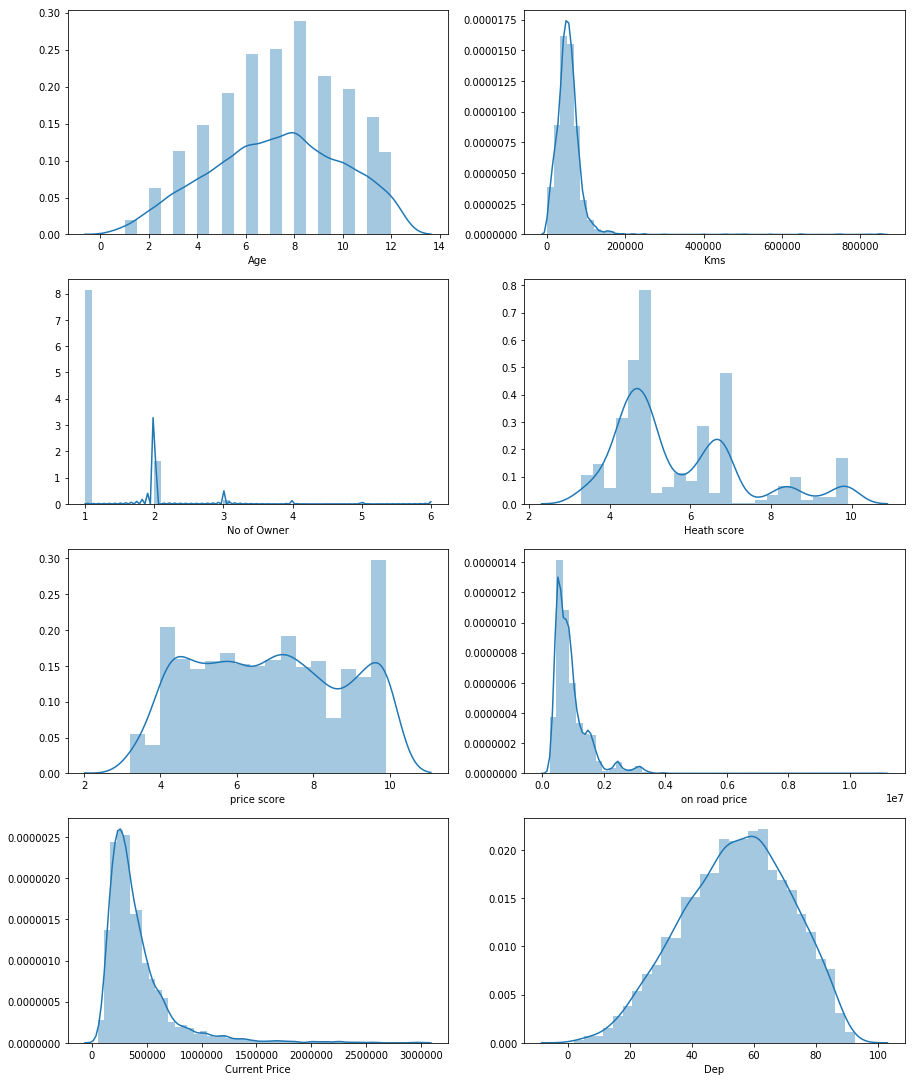

In [15]:
# visualizing the distribution of data

plt.figure(figsize=(15,19))
plt.subplot(421)
sns.distplot(data['Age'])

plt.subplot(422)
sns.distplot(data['Kms'])

plt.subplot(423)
sns.distplot(data['No of Owner'])

plt.subplot(424)
sns.distplot(data['Heath score'])

plt.subplot(425)
sns.distplot(data['price score'])

plt.subplot(426)
sns.distplot(data['on road price'])

plt.subplot(427)
sns.distplot(data['Current Price'])

plt.subplot(428)
sns.distplot(data['Dep'])

plt.show()

# Observation:
None of them are symmetry distributed

### 3.2 Categorical Variables

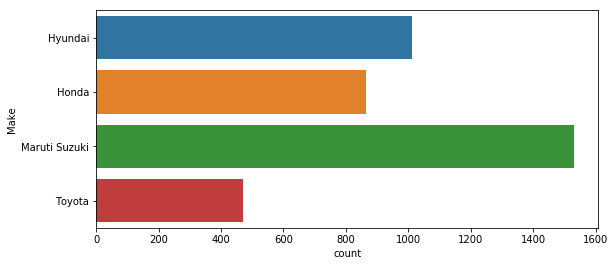

In [16]:
plt.figure(figsize=(9,4))
sns.countplot(y='Make', data=data)
plt.show()

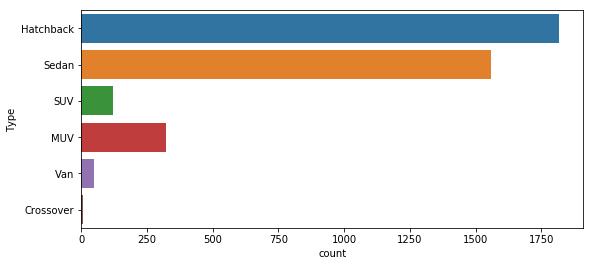

In [17]:
plt.figure(figsize=(9,4))
sns.countplot(y='Type', data=data)
plt.show()

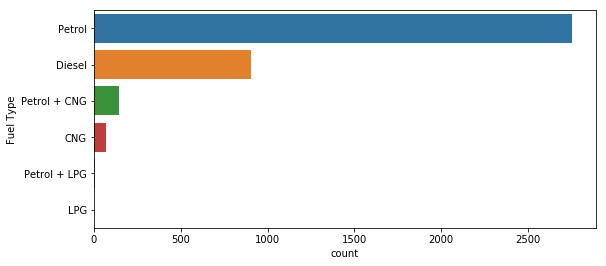

In [18]:
plt.figure(figsize=(9,4))
sns.countplot(y='Fuel Type', data=data)
plt.show()

## 4. Bivariate Analysis:

### 4.1 Continuous-Continuous Variables

In [19]:
data.corr()

,Age,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
Age,1.000000,0.265379,0.285003,0.023784,0.150776,-0.026417,-0.505058,0.801580
Kms,0.265379,1.000000,0.129468,-0.145941,0.056270,0.093638,-0.063192,0.241413
No of Owner,0.285003,0.129468,1.000000,-0.021901,0.157982,0.002652,-0.172258,0.288543
Heath score,0.023784,-0.145941,-0.021901,1.000000,-0.069167,-0.035551,-0.014941,-0.036664
price score,0.150776,0.056270,0.157982,-0.069167,1.000000,0.212435,-0.084041,0.426554
on road price,-0.026417,0.093638,0.002652,-0.035551,0.212435,1.000000,0.687403,0.151973
Current Price,-0.505058,-0.063192,-0.172258,-0.014941,-0.084041,0.687403,1.000000,-0.504591
Dep,0.801580,0.241413,0.288543,-0.036664,0.426554,0.151973,-0.504591,1.000000


# Observations :
we can't able to remove any variables because correlation is low(i am considering 8 or more as strong correlation)

### 4.2 Categorical-continuous variables:

In [20]:
data.groupby('Make')['Dep'].mean()

Make
Honda            63.996640
Hyundai          52.205040
Maruti Suzuki    51.031005
Toyota           52.024153
Name: Dep, dtype: float64

In [21]:
data.groupby('Type')['Dep'].mean()

Type
Crossover    34.816667
Hatchback    51.419186
MUV          40.826543
SUV          47.059016
Sedan        61.352246
Van          49.986000
Name: Dep, dtype: float64

In [22]:
data.groupby('Fuel Type')['Dep'].mean()

Fuel Type
CNG             54.471642
Diesel          46.848953
LPG             47.000000
Petrol          57.159041
Petrol + CNG    47.530769
Petrol + LPG    56.285714
Name: Dep, dtype: float64

# Observations:
From last three rows,I can observe that how closely these three categorical independent variables are related with target variable

## 5. Missing Value Treatment :

There is <b>no missing values</b> in datasets so this step is <b>not required</b>

## 6. Outlier Treatment:

i am using formula to remove outliers from top and bottom of box plot<br/>
<b>from top : Q3+1.5*(Q3-Q1)</b><br/>
<b>from bottom : Q1-1.5*(Q3-Q1)</b>

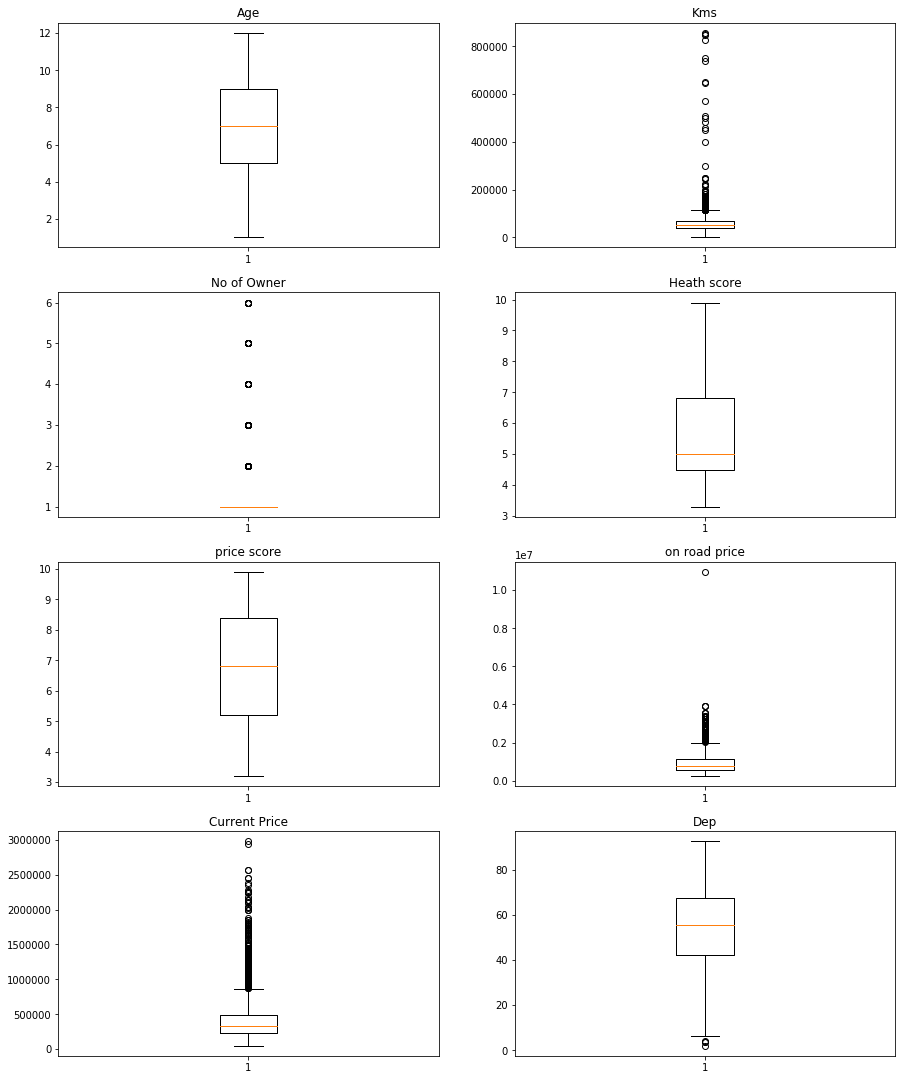

In [23]:
# visualizing which columns have outliers

plt.figure(figsize=(15,19))
plt.subplot(421)
plt.title('Age')
plt.boxplot(data['Age'])

plt.subplot(422)
plt.title('Kms')
plt.boxplot(data['Kms'])

plt.subplot(423)
plt.title('No of Owner')
plt.boxplot(data['No of Owner'])

plt.subplot(424)
plt.title('Heath score')
plt.boxplot(data['Heath score'])

plt.subplot(425)
plt.title('price score')
plt.boxplot(data['price score'])

plt.subplot(426)
plt.title('on road price')
plt.boxplot(data['on road price'])

plt.subplot(427)
plt.title('Current Price')
plt.boxplot(data['Current Price'])

plt.subplot(428)
plt.title('Dep')
plt.boxplot(data['Dep'])

plt.show()

# Observations:

1. 'Dep' column is target variable and labelled by someone so i am not treating its value as outlier
1. I am not going to handle 'No of Owner' columns as i had pointed above that it is categorical in nature

In [24]:
# removing outliers

data.loc[(data['Kms']>100000.0),'Kms']=data['Kms'].median()
data.loc[(data['on road price']>1550000),'on road price']=data['on road price'].median()
data.loc[(data['Current Price']>680000),'Current Price']=data['Current Price'].median()

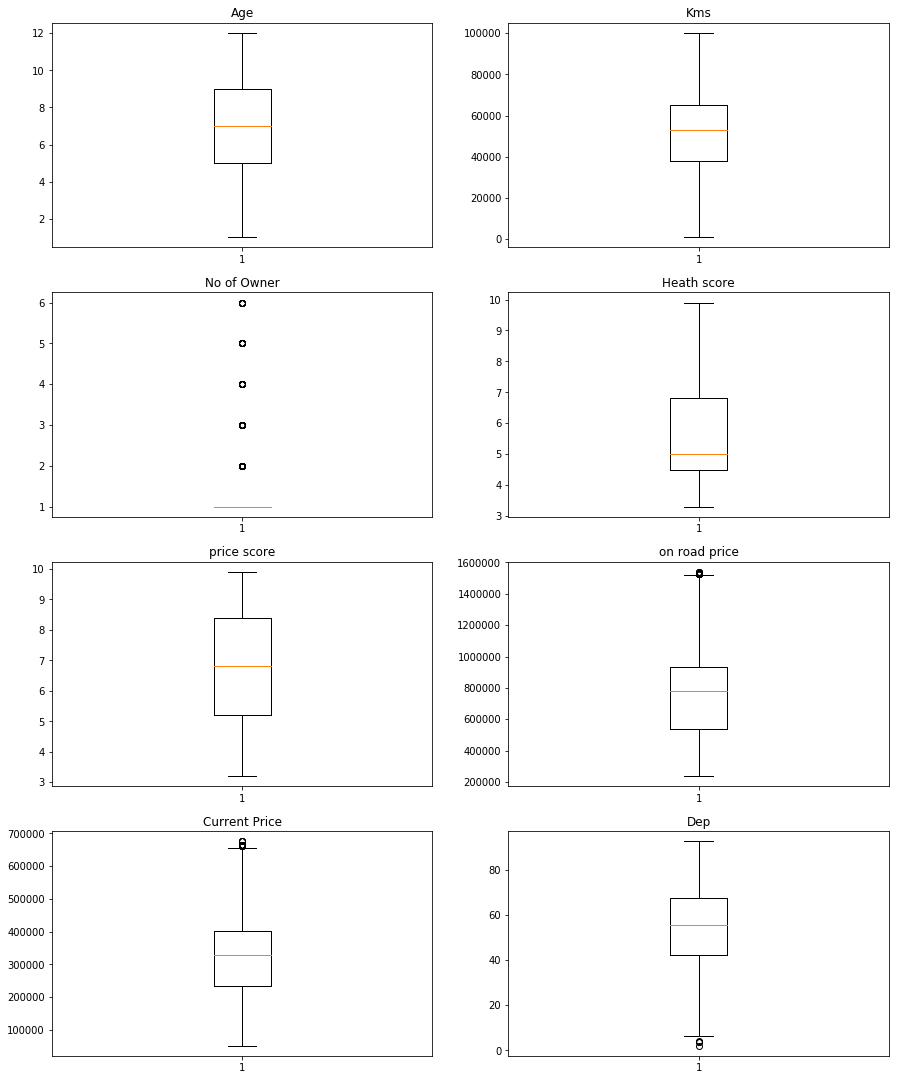

In [25]:
# after removing outliers

plt.figure(figsize=(15,19))
plt.subplot(421)
plt.title('Age')
plt.boxplot(data['Age'])

plt.subplot(422)
plt.title('Kms')
plt.boxplot(data['Kms'])

plt.subplot(423)
plt.title('No of Owner')
plt.boxplot(data['No of Owner'])

plt.subplot(424)
plt.title('Heath score')
plt.boxplot(data['Heath score'])

plt.subplot(425)
plt.title('price score')
plt.boxplot(data['price score'])

plt.subplot(426)
plt.title('on road price')
plt.boxplot(data['on road price'])

plt.subplot(427)
plt.title('Current Price')
plt.boxplot(data['Current Price'])

plt.subplot(428)
plt.title('Dep')
plt.boxplot(data['Dep'])

plt.show()

## 7. Transformation:

In [26]:
# converting 'object' type into 'int' type because scikit works on numerical data

from sklearn.preprocessing import LabelEncoder

col=['MMV', 'Make','Model','Variant','Type','Fuel Type','Transmission','Color']

le=LabelEncoder()

for i in col:
    data[i]=le.fit_transform(data[i]).astype(np.int)

In [27]:
data.head(3)

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,193,1,35,347,1,3,3,2,31,12000.0,1,8.5,8.8,537850.0,338352.0,37.1
1,212,1,36,305,1,3,9,2,0,68000.0,1,5.0,7.3,613863.0,189200.0,69.2
2,218,1,36,347,1,3,8,2,31,31143.0,1,6.2,4.6,678359.0,347568.0,48.8


In [28]:
# splitting the dataset into independent and dependent variables

x=data.drop('Dep',axis=1)
y=data['Dep']

In [29]:
# bringing all data in the range of 0 and 1 so that every independent variables have chance of predicting target varibale

from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()

x=mm.fit_transform(x)

# 8. Modeling :

In [30]:
# now splitting the whole dataset into training and testing 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=11)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3103, 15)
(776, 15)
(3103,)
(776,)


## Applying Linear Regression technique:

In [31]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([60.01783877, 36.66509493, 27.95690248, 26.08241289, 31.0876546 ,
       59.17477529, 43.63923805, 55.31850734, 42.61192726, 74.22342567,
       64.87527181, 57.91721967, 55.87286041, 49.46405756, 53.47266067,
       40.72886936, 80.20498346, 37.02922238, 64.57229035, 73.40538972,
       50.48107378, 71.69091925, 41.75006353, 61.47991346, 59.35134796,
       38.56723828, 60.43368094, 63.36538406, 42.1554044 , 23.72310739,
       33.97759142, 77.25973357, 32.28874759, 42.33503951, 30.25299043,
       49.58184287, 62.79079245, 49.01410183, 64.10378661, 79.10059964,
       56.04443912, 70.59385813, 68.32280035, 81.67686802, 51.24633949,
       50.32144118, 46.25280301, 37.42498511, 38.00621084, 47.89512275,
       59.61619473, 54.7908509 , 81.40511903, 76.80171944, 76.50128164,
       58.69201149, 44.79243122, 38.67741092, 56.78993768, 31.0918568 ,
       58.61032969, 51.68726965, 75.79139732, 74.72978727, 42.1401777 ,
       45.2831317 , 79.38145994, 46.63188353, 42.46494737, 69.60

In [33]:
from sklearn.metrics import r2_score

training_score1=r2_score(y_train,lr.predict(x_train))
testing_score1=r2_score(y_test,y_pred)

print(training_score1)
print(testing_score1)

0.7932811370369031
0.7583836961955474


## Applying Regularisation(Lasso,Ridge) techniques:

In [34]:
# this techniq,i had used to consider only those independent variable which are considering in predicting the target variable 
# improving the result as compare to Linear Regression

from sklearn.linear_model import Lasso

LS=Lasso(alpha=1.0)
LS.fit(x_train,y_train)
y_pred=LS.predict(x_test)

In [35]:
training_score2=r2_score(y_train,LS.predict(x_train))
testing_score2=r2_score(y_test,y_pred)

print(training_score2)
print(testing_score2)

0.6602909669396391
0.6433404240467966


In [36]:
# again i had used to improve the accuracy 

from sklearn.linear_model import Ridge

Rg=Ridge(alpha=0.3)
Rg.fit(x_train,y_train)
y_pred=Rg.predict(x_test)

In [37]:
training_score3=r2_score(y_train,Rg.predict(x_train))
testing_score3=r2_score(y_test,y_pred)

print(training_score3)
print(testing_score3)

0.793276394460642
0.7586266227491832


## Applying Random Forest technique:

In [38]:
# again this techniqe is used to improve the performance of the model

from sklearn.ensemble import RandomForestRegressor

RFR=RandomForestRegressor(n_estimators=20)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)

In [39]:
training_score4=r2_score(y_train,RFR.predict(x_train))
testing_score4=r2_score(y_test,y_pred)

print(training_score4)
print(testing_score4)

0.9868553554046696
0.9077630838430679


# Comparing all four models

In [40]:
accuracy=[[training_score1,testing_score1],[training_score2,testing_score2],[training_score3,testing_score3],[training_score4,testing_score4]]
classifier=['Linear_Regression','Lasso','Ridge','Random_Forest_Regressor']

pd.DataFrame(accuracy,index=classifier,columns=['r2score_train_data','r2score_test_data'])

,r2score_train_data,r2score_test_data
Linear_Regression,0.793281,0.758384
Lasso,0.660291,0.643340
Ridge,0.793276,0.758627
Random_Forest_Regressor,0.986855,0.907763


# Conclusion:
Linear Regression is performing better than Lasso and Ridge and Random Forest Regressor is performing better than Linear Regression and this is happening due to overfitting.<br/>
So i am choosing <b>Linear Regression model for this dataset</b>